Dịch (Translation): Di chuyển một hình học từ vị trí này sang vị trí khác mà không làm thay đổi hình dạng của nó.

Quay (Rotation): Quay một hình học quanh một điểm xác định với một góc quay cụ thể.

Phóng to/Thu nhỏ (Scaling): Tăng kích thước của hình học (phóng to) hoặc giảm kích thước của nó (thu nhỏ).

Phản chiếu (Reflection): Tạo ra một hình ảnh phản chiếu của hình học qua một đường (thường là một đường thẳng).

Đối xứng (Symmetry): Tạo ra một hình ảnh đối xứng của hình học liên quan đến một trục, một điểm hoặc một đường.

Đồng nhất (Congruence): Biến đổi một hình học sao cho nó trùng khớp hoặc đồng nhất với một hình khác mà không làm thay đổi kích thước hoặc hình dạng của nó.

Song song (Parallelism): Giữ nguyên các đoạn thẳng song song với nhau sau khi biến đổi.

Vuông góc (Perpendicularity): Giữ nguyên góc vuông giữa các đoạn thẳng sau khi biến đổi.

Đồng đội (Similarity): Tạo ra một hình ảnh giống với hình gốc, nhưng có thể khác về kích thước.

Trung bình điểm (Midpoint): Di chuyển một hình học sao cho điểm trung điểm của các đoạn thẳng không thay đổi.

Tịnh tiến (Shear): Làm thay đổi hình dạng của một hình học bằng cách giữ nguyên hình dạng của nó nhưng làm thay đổi kích thước của các đoạn thẳng trong hình dạng đó.

Biến đổi đồng nhất (Homothety): Một phép biến đổi tương tự như phóng to/thu nhỏ nhưng có thể tập trung ở một điểm khác không phải gốc tọa độ.

Đồng dạng (Similarity Transformation): Kết hợp phép biến đổi phóng to/thu nhỏ và quay, bảo toàn tỉ lệ và góc giữa các đoạn thẳng.

Biến đổi Möbius (Möbius Transformation): Là một phép biến đổi tuyến tính và không gian, giữ nguyên các đường tròn và đường thẳng.

Biến đổi affine (Affine Transformation): Kết hợp các phép biến đổi tịnh tiến, phóng to/thu nhỏ và xoay, giữ nguyên đồng bằng tuyến tính.

Biến đổi tự nhiên (Natural Transformation): Một loại biến đổi hình học giữ nguyên một số tính chất của hình học trong khi thay đổi hình dạng.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Scaling
Scaling is just resizing of the image. OpenCV comes with a function cv.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. By default, the interpolation method cv.INTER_LINEAR is used for all resizing purposes. You can resize an input image with either of following methods:

In [13]:
def display(img):

  dpi = 80
  height, width= img.shape[:2]

  # What size does the figure need to be in inches to fit the image?
  # convert size in px to be inches
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')
  # Display the image.
  ax.imshow(img)

  plt.show()

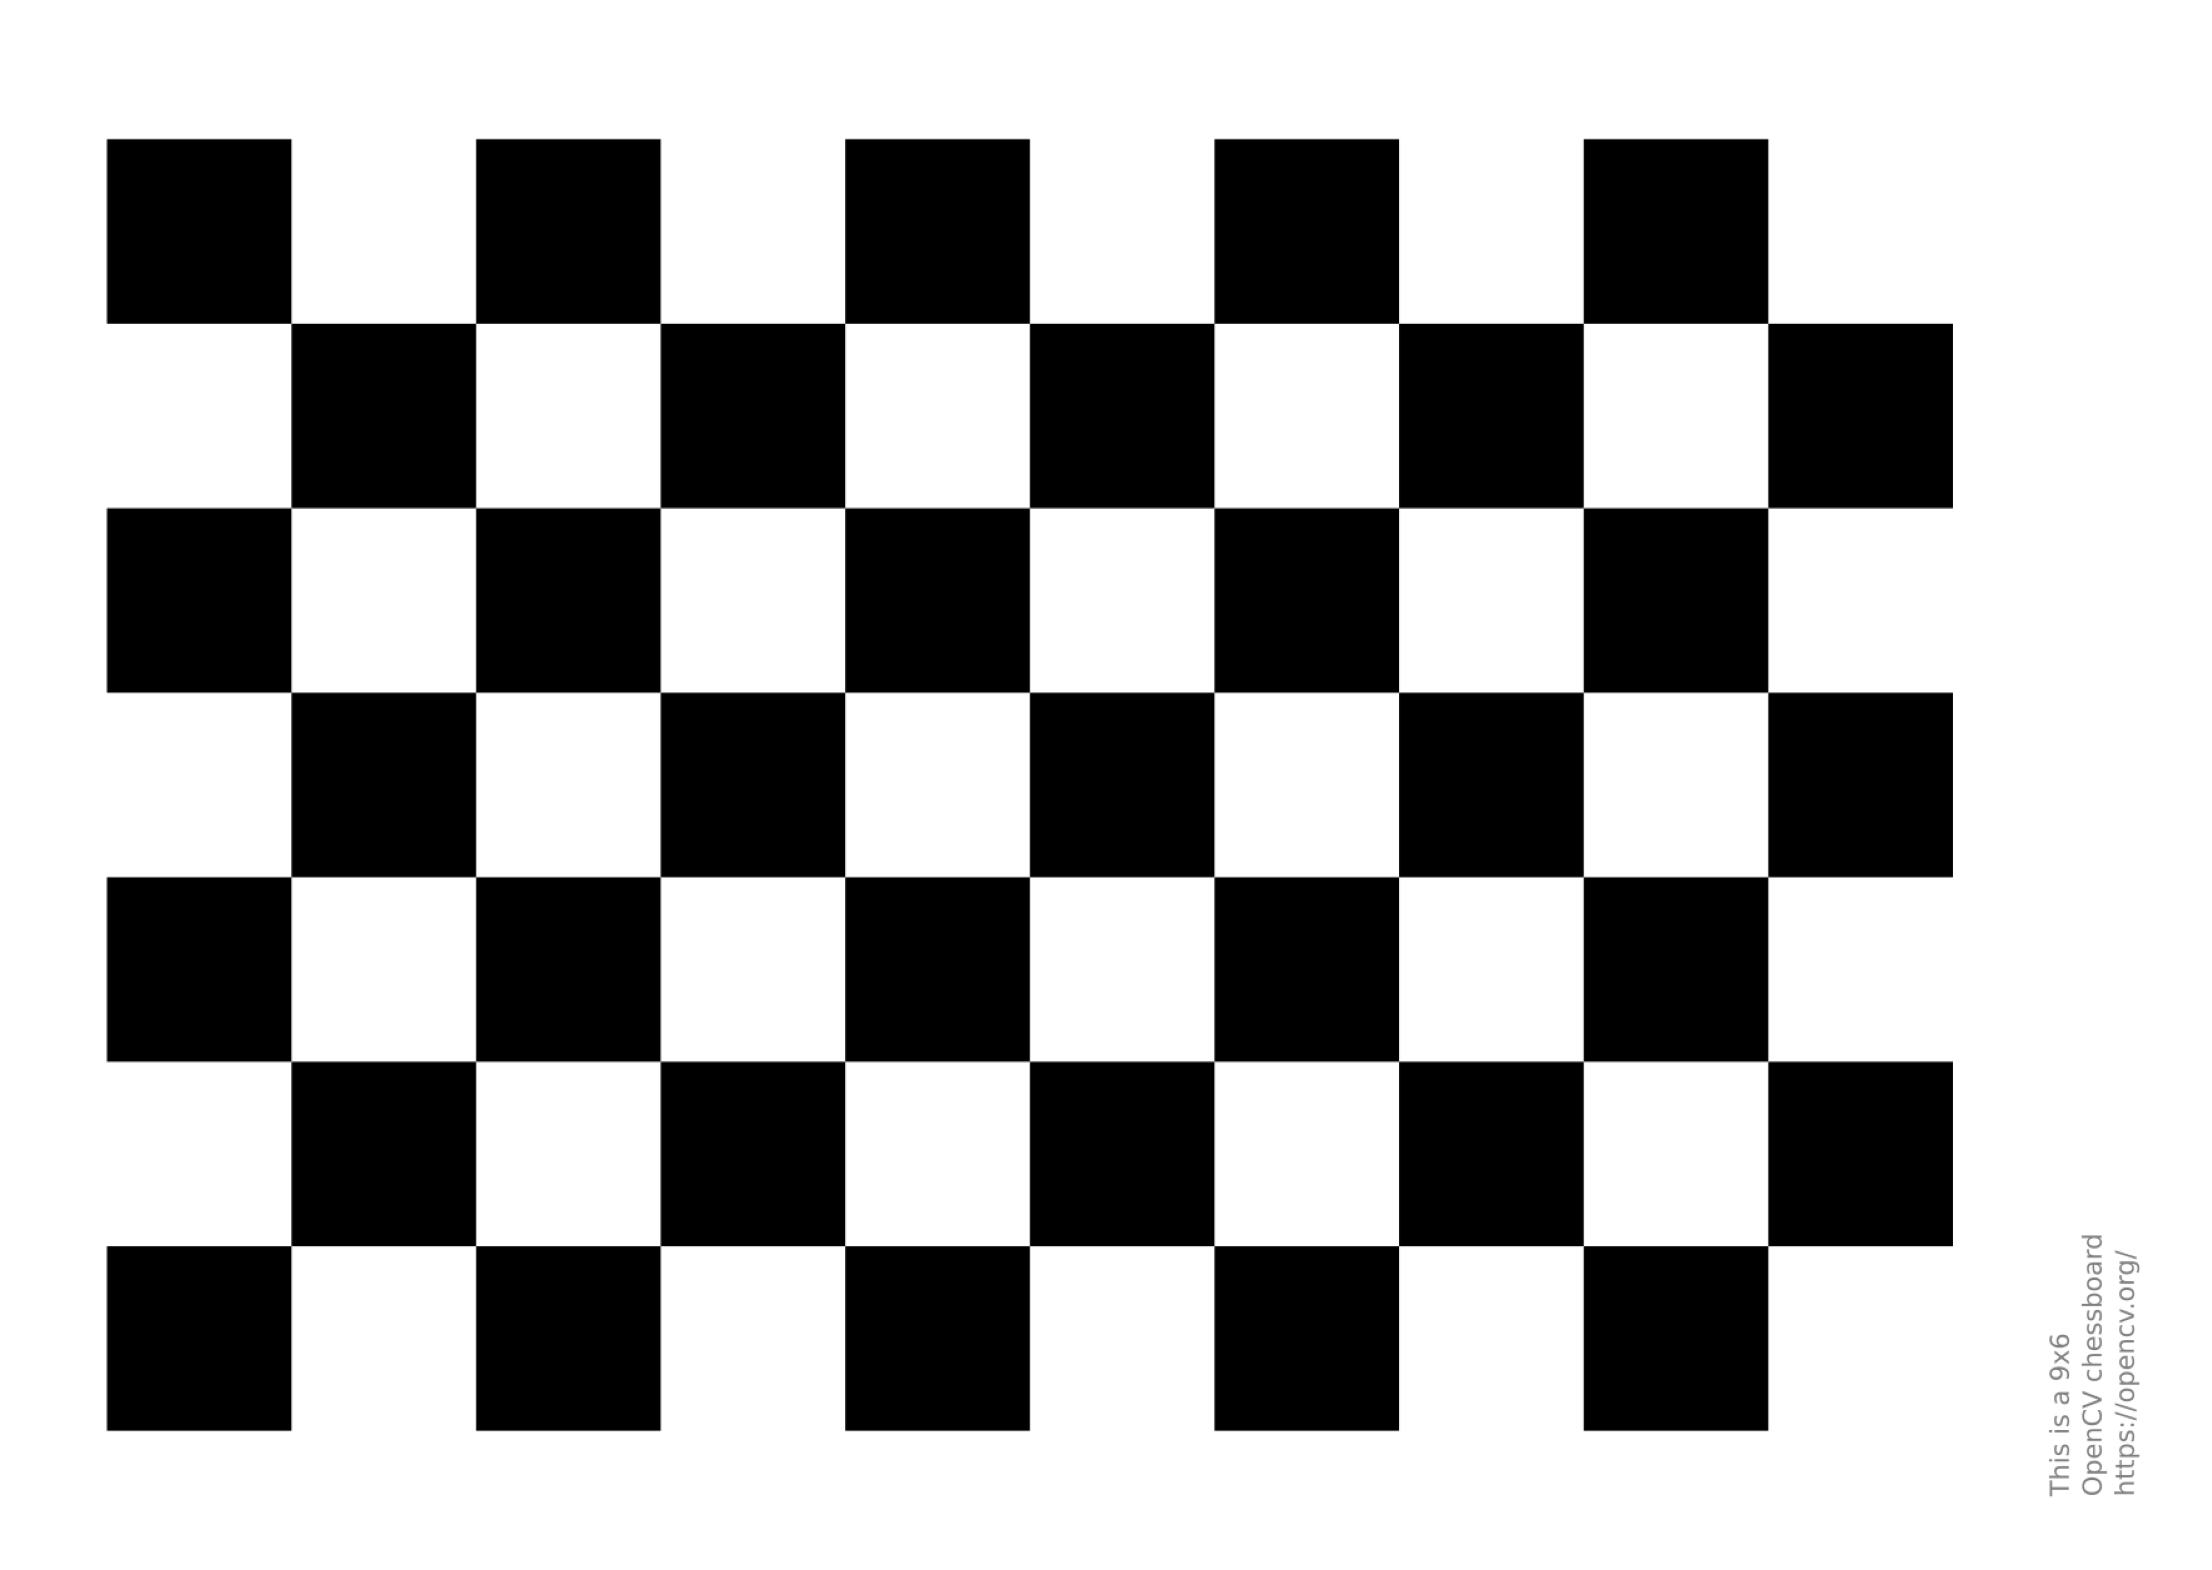

In [14]:
img = cv2.imread("caro.png")
assert img is not None, "file could not be read, check with os.path.exists()"
display(img)

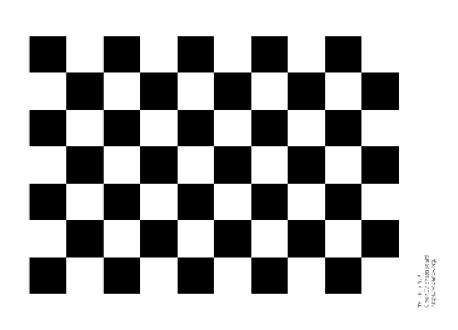

In [15]:
res = cv2.resize(img, None, fx= 0.2, fy = 0.2, interpolation = cv2.INTER_CUBIC)
display(res)

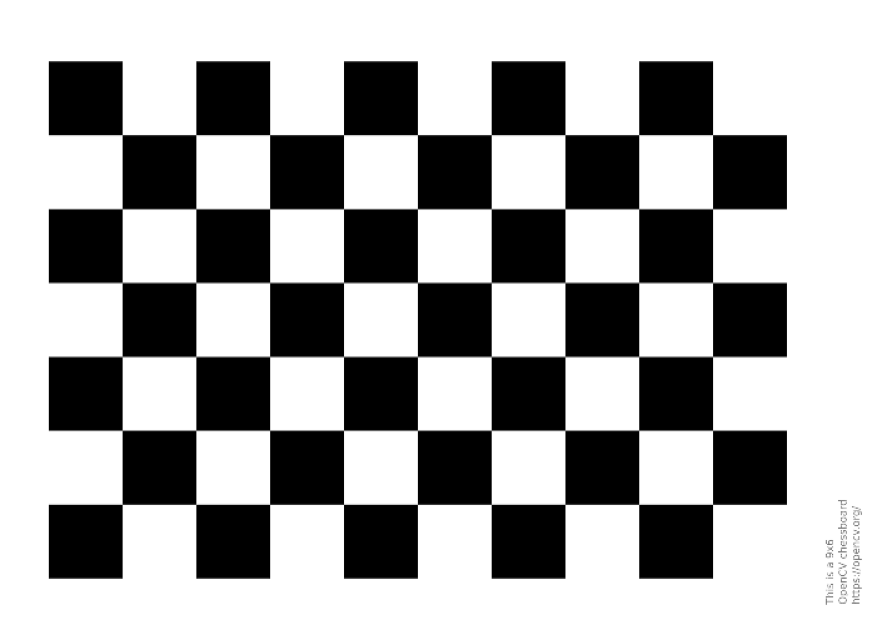

In [21]:
height, width = img.shape[:2]
# interpolation=cv2.INTER_CUBIC: Phương pháp nội suy sẽ được sử dụng để điền vào các giá trị pixel mới khi thay đổi kích thước. 
res = cv2.resize(img,(int(0.4*width), int(0.4*height)), interpolation = cv2.INTER_CUBIC)
display(res)

## Translation
Translation is the shifting of an object's location. If you know the shift in the (x,y) direction and let it be (tx,ty), you can create the transformation matrix M as follows:

M=  |   1   0   tx |
    |   0   1   tx |

You can take make it into a Numpy array of type np.float32 and pass it into the cv.warpAffine() function. See the below example for a shift of (100,50):

In [13]:
import numpy as np
import cv2 as cv
img = cv.imread('Picture.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()